#inceptionV1


##Importing

In [ ]:
!cp -r "/content/drive/MyDrive/splitted" /content/

In [ ]:
import os
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

##Data PreProcessing

In [ ]:
data_source = "/content/splitted"
train_data = os.path.join(data_source, "train")


In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    train_data,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    train_data,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)





Found 3356 images belonging to 10 classes.
Found 834 images belonging to 10 classes.


##Download & Train

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers, models

NUM_CLASSES = 10

inputs = tf.keras.Input(shape=(224, 224, 3))

feature_extractor_layer = hub.KerasLayer(
    "https://tfhub.dev/google/imagenet/inception_v1/feature_vector/5",
    trainable=False
)

x = layers.Lambda(lambda img: feature_extractor_layer(img))(inputs)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(NUM_CLASSES, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 346s 3s/step - accuracy: 0.6230 - loss: 1.1548 - val_accuracy: 0.8573 - val_loss: 0.4064
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 339s 3s/step - accuracy: 0.9353 - loss: 0.2132 - val_accuracy: 0.9149 - val_loss: 0.2537
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 356s 3s/step - accuracy: 0.9445 - loss: 0.1700 - val_accuracy: 0.9041 - val_loss: 0.2519
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 389s 4s/step - accuracy: 0.9525 - loss: 0.1396 - val_accuracy: 0.8813 - val_loss: 0.3132
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 342s 3s/step - accuracy: 0.9513 - loss: 0.1417 - val_accuracy: 0.9341 - val_loss: 0.2034
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 341s 3s/step - accuracy: 0.9673 - loss: 0.1057 - val_accuracy: 0.9424 - val_loss: 0.1834
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 338s 3s/step - accuracy: 0.9600 - loss: 0.1139 - val_accuracy: 0.9233 - val_loss: 0.2101
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 354s 3s/step - accuracy: 0.9700 - loss: 0.0874 - val_accu

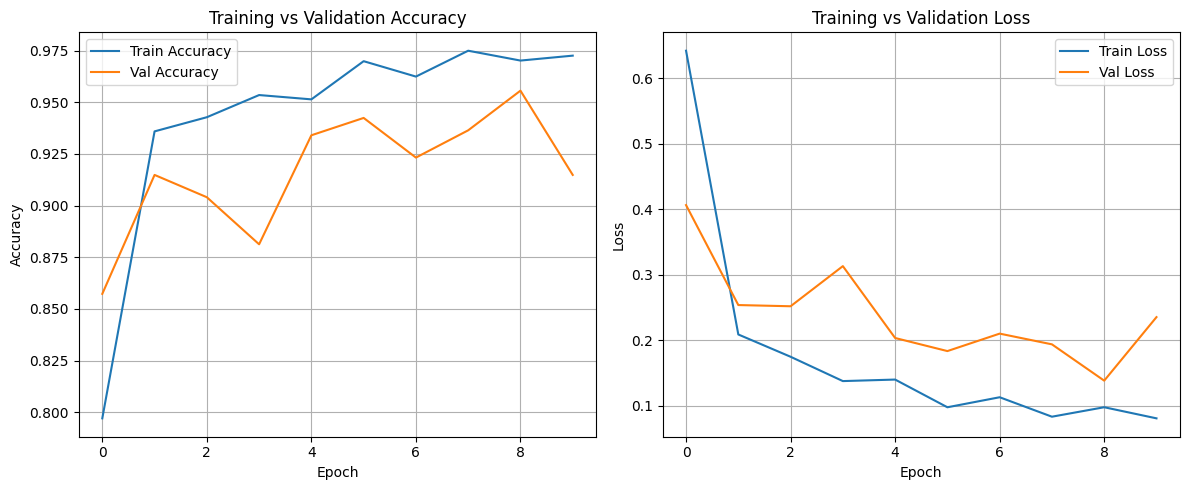

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


##Evaluation & Visualization

In [ ]:
test_data = os.path.join(data_source, "test")

test_datagen = ImageDataGenerator(rescale=1./255)
img_size = (224, 224)
batch_size = 32
test_gen = test_datagen.flow_from_directory(
    test_data,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

Found 1053 images belonging to 10 classes.


In [ ]:
import numpy as np

test_gen.reset()

y_test_prob = model.predict(test_gen, verbose=1)
y_test_pred = np.argmax(y_test_prob, axis=1)
y_test_true = test_gen.classes

class_names = list(test_gen.class_indices.keys())
num_classes = len(class_names)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

test_accuracy = accuracy_score(y_test_true, y_test_pred)
print("Test Accuracy:", test_accuracy)

print("\nTest Classification Report:")
print(classification_report(
    y_test_true,
    y_test_pred,
    target_names=class_names,
    digits=4
))

Test Accuracy: 0.9677113010446344

Test Classification Report:
                 precision    recall  f1-score   support

        call_me     0.9725    1.0000    0.9860       106
fingers_crossed     0.8417    1.0000    0.9140       101
           okay     0.9908    1.0000    0.9954       108
          paper     1.0000    0.9722    0.9859       108
          peace     0.9027    0.9623    0.9315       106
           rock     1.0000    0.9804    0.9901       102
        rock_on     1.0000    0.9533    0.9761       107
        scissor     1.0000    0.8585    0.9239       106
         thumbs     1.0000    0.9537    0.9763       108
             up     1.0000    1.0000    1.0000       101

       accuracy                         0.9677      1053
      macro avg     0.9708    0.9680    0.9679      1053
   weighted avg     0.9713    0.9677    0.9681      1053



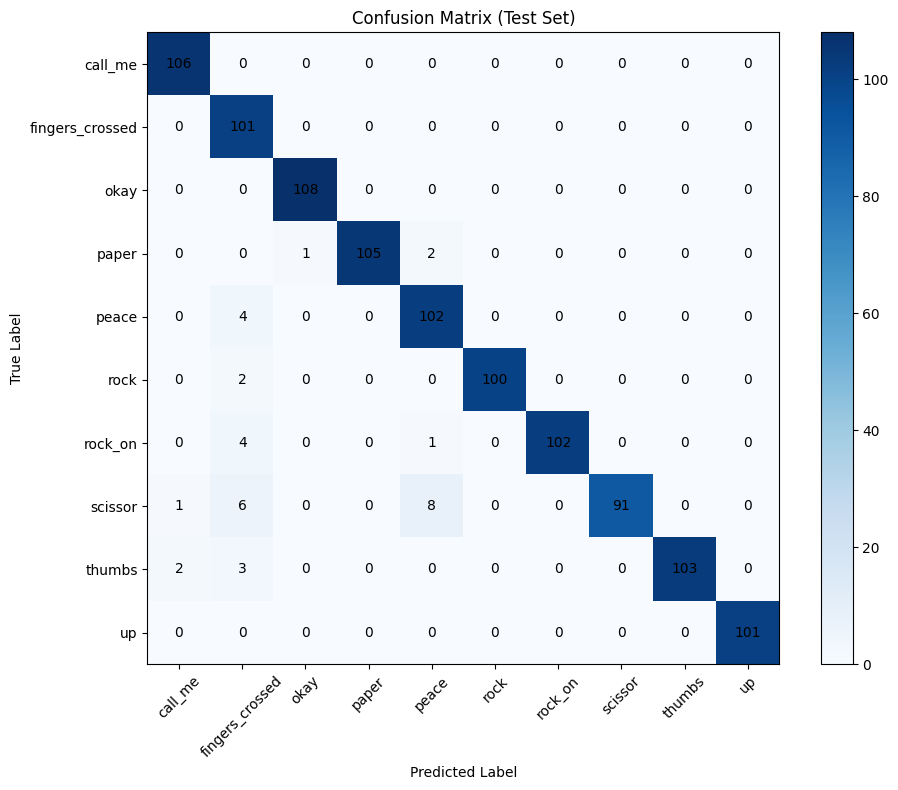

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_true, y_test_pred)

plt.figure(figsize=(10, 8))
plt.imshow(cm, cmap="Blues")   # 🔹 try: "Greens", "Oranges", "Purples"
plt.title("Confusion Matrix (Test Set)")
plt.colorbar()
plt.xticks(range(num_classes), class_names, rotation=45)
plt.yticks(range(num_classes), class_names)

for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


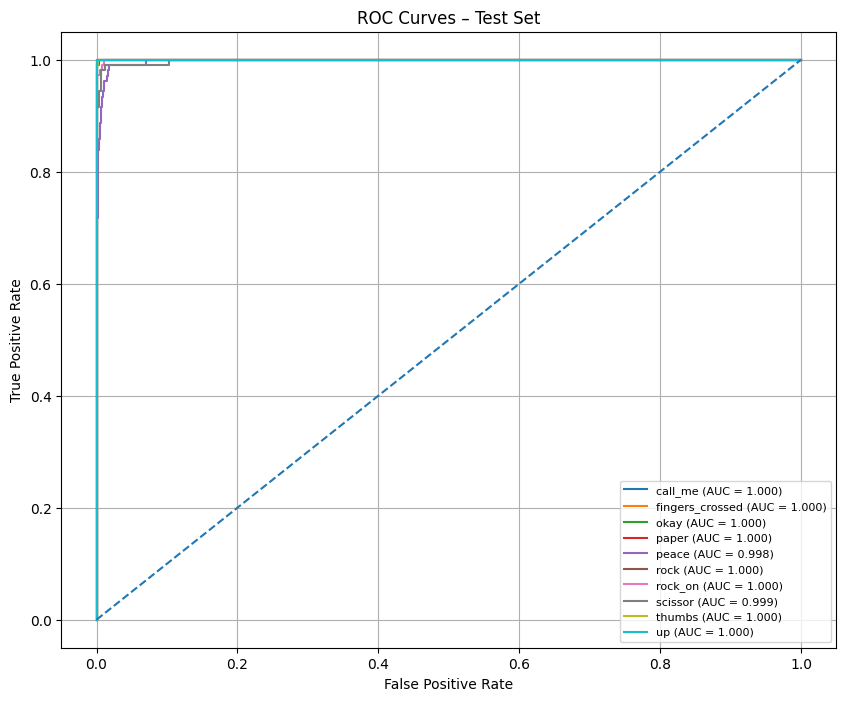

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

y_test_bin = label_binarize(y_test_true, classes=range(num_classes))

plt.figure(figsize=(10, 8))

for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_test_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {roc_auc:.3f})")

plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves – Test Set")
plt.legend(loc="lower right", fontsize=8)
plt.grid()
plt.show()


In [ ]:
model.save("/content/drive/MyDrive/DL_Colabs/final models/inceptionV1.keras")